In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from keras.models import Sequential
import tensorflow as tf

import glob, os, random

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
os.getcwd()

'/content'

In [0]:
base_path = 'drive/My Drive/Colab Notebooks/Dataset'

img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))

print(len(img_list))

2538


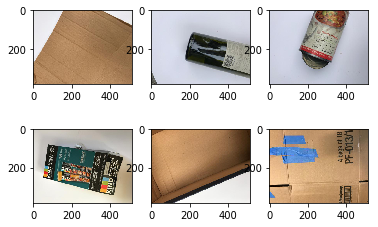

In [0]:
for i, img_path in enumerate(random.sample(img_list, 6)):
    img = load_img(img_path)
    img = img_to_array(img, dtype=np.uint8)

    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

print(labels)

Found 2286 images belonging to 6 classes.
Found 252 images belonging to 6 classes.
{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [0]:
IMG_SHAPE = (224,224,3)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False, 
                                               weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.
9412608/9406464 [==============================] - 1s 0us/step


In [0]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Flatten(),

    Dense(64, activation='relu'),

    Dense(6, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 56, 56, 32)        18464     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 32)        9248      
__________

In [0]:
batch_size = 32
epochs = 20

history = model.fit_generator(train_generator, 
                    steps_per_epoch=train_generator.n // train_generator.batch_size, 
                    epochs = epochs,
                    workers = 4,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.n // validation_generator.batch_size, 
                    verbose=1)


Instructions for updating:
Use tf.cast instead.
Epoch 1/20
142/142 [==============================] - 285s 2s/step - loss: 1.6548 - acc: 0.2764 - val_loss: 1.5253 - val_acc: 0.3583
Epoch 2/20
142/142 [==============================] - 266s 2s/step - loss: 1.4497 - acc: 0.4128 - val_loss: 1.4759 - val_acc: 0.4322
Epoch 3/20
142/142 [==============================] - 265s 2s/step - loss: 1.3832 - acc: 0.4317 - val_loss: 1.3475 - val_acc: 0.4153
Epoch 4/20
142/142 [==============================] - 273s 2s/step - loss: 1.3177 - acc: 0.4608 - val_loss: 1.3914 - val_acc: 0.4449
Epoch 5/20
142/142 [==============================] - 274s 2s/step - loss: 1.2473 - acc: 0.4993 - val_loss: 1.6125 - val_acc: 0.4449
Epoch 6/20
142/142 [==============================] - 274s 2s/step - loss: 1.2191 - acc: 0.5155 - val_loss: 1.3080 - val_acc: 0.4746
Epoch 7/20
142/142 [==============================] - 283s 2s/step - loss: 1.1079 - acc: 0.5741 - val_loss: 1.2368 - val_acc: 0.5381
Epoch 8/20
142/142 [=

Epoch 1/20
142/142 [==============================] - 303s 2s/step - loss: 0.6759 - acc: 0.7458 - val_loss: 0.9028 - val_acc: 0.6695
Epoch 2/20
142/142 [==============================] - 296s 2s/step - loss: 0.7029 - acc: 0.7481 - val_loss: 0.9696 - val_acc: 0.6568
Epoch 3/20
142/142 [==============================] - 296s 2s/step - loss: 0.6798 - acc: 0.7594 - val_loss: 0.7899 - val_acc: 0.7034
Epoch 4/20
142/142 [==============================] - 297s 2s/step - loss: 0.6373 - acc: 0.7671 - val_loss: 0.8871 - val_acc: 0.6864
Epoch 5/20
142/142 [==============================] - 296s 2s/step - loss: 0.6175 - acc: 0.7701 - val_loss: 0.7405 - val_acc: 0.7203
Epoch 6/20
142/142 [==============================] - 295s 2s/step - loss: 0.6084 - acc: 0.7723 - val_loss: 0.9270 - val_acc: 0.6864
Epoch 7/20
142/142 [==============================] - 294s 2s/step - loss: 0.6163 - acc: 0.7733 - val_loss: 0.8852 - val_acc: 0.6907
Epoch 8/20
142/142 [==============================] - 295s 2s/step - 

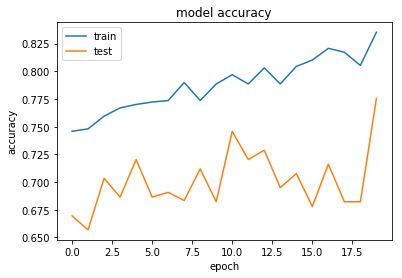

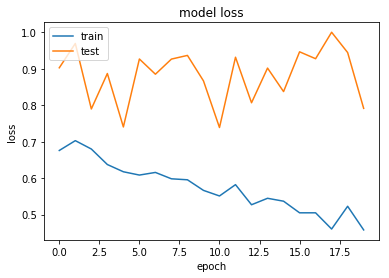

In [0]:

batch_size = 32
epochs = 20

history = model.fit_generator(train_generator, 
                    steps_per_epoch=train_generator.n // train_generator.batch_size, 
                    epochs = epochs,
                    workers = 4,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.n // validation_generator.batch_size, 
                    verbose=1)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

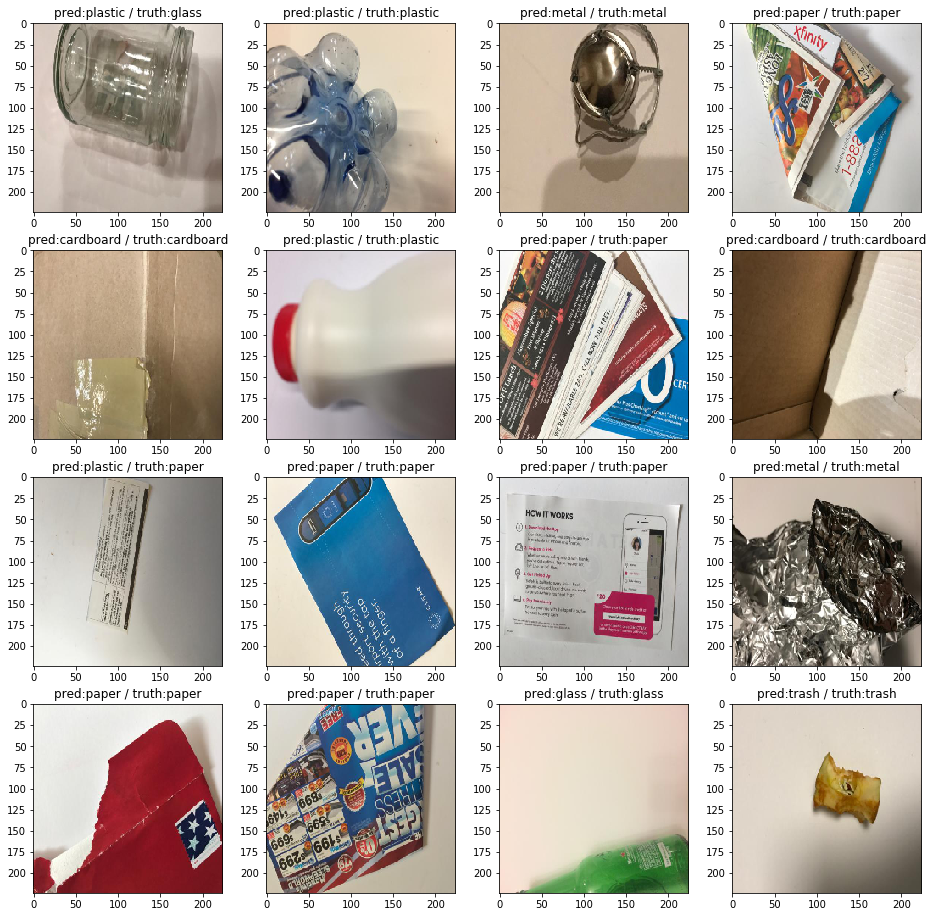

In [0]:
test_x, test_y = validation_generator.__getitem__(1)

preds = model.predict(test_x)

plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])